In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

In [3]:
busstop_cnt = pd.read_csv('C:/Users/admin/Desktop/WithU-HJ/Bus_route/res/busstop_cnt.csv')
busstop_cnt.head()

,BUSLINENUM,cnt
0,10,118
1,100,128
2,100-1,124
3,1000,80
4,1000(심야),138


In [4]:
busstop_cnt = busstop_cnt.rename(columns={'BUSLINENUM' : '노선번호', 'cnt' : '정류장개수'})
busstop_cnt.head()

,노선번호,정류장개수
0,10,118
1,100,128
2,100-1,124
3,1000,80
4,1000(심야),138


In [5]:
bustime_cnt = pd.read_csv('C:/Users/admin/Desktop/WithU-HJ/Bus_route/res/bustime_cnt.csv')
bustime_cnt.head()

,노선번호,운행거리(km),평균 배차간격,평균 운행횟수
0,2,39.8,9.75,101.333333
1,3,49.3,14.25,67.666667
2,5-1,56.1,15.50,61.333333
3,6,38.3,8.25,107.333333
4,7,30.7,15.50,57.333333


In [6]:
BUS = pd.merge(left=busstop_cnt, right=bustime_cnt, how='left', on='노선번호')
BUS

,노선번호,정류장개수,운행거리(km),평균 배차간격,평균 운행횟수
0,10,118,49.2,11.50,85.666667
1,100,128,56.4,15.25,53.333333
2,100-1,124,53.7,13.25,69.333333
3,1000,80,44.2,13.25,74.000000
4,1000(심야),138,NaN,NaN,NaN
...,...,...,...,...,...
160,9,101,34.6,17.75,55.000000
161,90,24,9.8,11.50,68.000000
162,96,105,32.3,7.00,146.000000
163,96-1,99,40.7,38.75,25.000000


In [7]:
BUS = BUS.dropna(axis=0)
BUS = BUS.reset_index(drop=True)
BUS

,노선번호,정류장개수,운행거리(km),평균 배차간격,평균 운행횟수
0,10,118,49.2,11.50,85.666667
1,100,128,56.4,15.25,53.333333
2,100-1,124,53.7,13.25,69.333333
3,1000,80,44.2,13.25,74.000000
4,1001,89,78.8,10.25,98.333333
...,...,...,...,...,...
138,9,101,34.6,17.75,55.000000
139,90,24,9.8,11.50,68.000000
140,96,105,32.3,7.00,146.000000
141,96-1,99,40.7,38.75,25.000000


In [10]:
BUS_corr = BUS.corr()
BUS_corr

,정류장개수,운행거리(km),평균 배차간격,평균 운행횟수
정류장개수,1.000000,0.441072,-0.049254,-0.089056
운행거리(km),0.441072,1.000000,0.399056,-0.456717
평균 배차간격,-0.049254,0.399056,1.000000,-0.797112
평균 운행횟수,-0.089056,-0.456717,-0.797112,1.000000


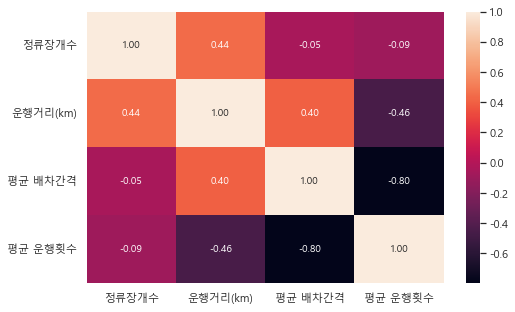

In [11]:
sns.heatmap(BUS_corr, annot=True, fmt='.2f')
plt.rcParams['figure.figsize'] = (8,5)